# From Road Network to Graph

This section contains a non-exhaustive list of operations on geospatial data that you should familiarize yourself with. More information can be found by consulting the [Tools and Python Libraries](../ToolsAndPythonLibraries/index.md) page or the respective libary's API documentation.

---

## Creating a Graph from a named place

Mathematically speaking, a graph can be represented by $G$, where 

$G=(V,E)$
<br><br>

For a graph $G$, vertices are represented by $V$, and edges by $E$.
 
Each edge is a tuple $(v,w)$, where 

$w$, $v \in V$

Weight can be added as a third component to the edge tuple.<br><br>

In other words, graphs consist of 3 sets: 

- vertices/nodes
- edges
- a set representing relations between vertices and edges 

The nodes represent intersections, and the edges represent the roads themselves. A `route` is a sequence of edges connecting the `origin node` to the `destination node`. <br><br>

`osmnx` can convert a text descriptor of a place into a `networkx` graph. Let's use the University of Toronto as an example:

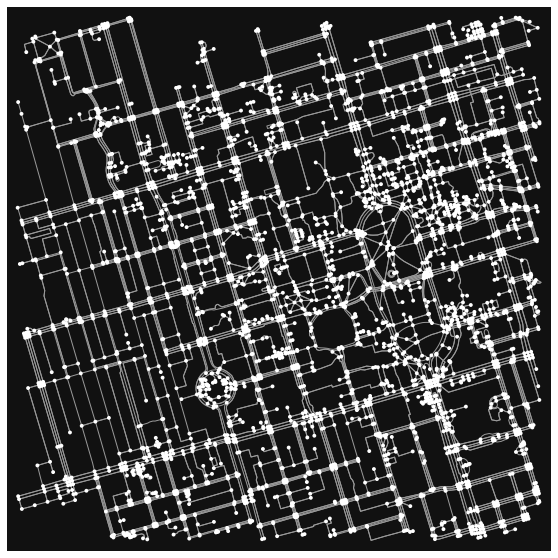

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [1]:
import osmnx

place_name = "University of Toronto"


# networkx graph of the named place
graph = osmnx.graph_from_address(place_name)

# Plot the graphs
osmnx.plot_graph(graph,figsize=(10,10))

The graph shows edges and nodes of the road network surrouding the University of Toronto's St. George (downtown Toronto) campus. While it may look visually interesting, it extends a bit too far off campus, and lacks the context of the street names and other geographic features. Let's restrict the scope of the network to 500 meters around the university, and use a `folium` map as a baselayer. We will discuss more about `folium` later in this section.
<br><br>

In [10]:
graph = osmnx.graph_from_address(place_name, dist=300)
osmnx.folium.plot_graph_folium(graph)

---
Suppose you want to get from one location to another on this campus.

Starting at the [King Edward VII Equestrian Statue](https://torontoist.com/2014/12/historicist-here-comes-the-equestrian-statue/) near Queen's Park, you need to cut across the campus to attend a lecture at the [Bahen Centre for Information Technology](https://en.wikipedia.org/wiki/Bahen_Centre_for_Information_Technology). Later in this section, you will see how you can calculate the shortest path between these two points.
<br><br>
For now, let's plot these two locations on the map using `ipyleaflet`:

In [11]:
from ipyleaflet import *

# UofT main building
center=(43.662643, -79.395689) 
# King Edward VII Equestrian Statue
source_point = (43.664527, -79.392442)  
# Bahen Centre for Information Technology at UofT
destination_point = (43.659659, -79.397669) 

m = Map(center=center, zoom=15)
m.add_layer(Marker(location=source_point, icon=AwesomeIcon(name='camera', marker_color='red')))
m.add_layer(Marker(location=center, icon=AwesomeIcon(name='graduation-cap')))
m.add_layer(Marker(location=destination_point, icon=AwesomeIcon(name='university',marker_color='green')))
m

Map(center=[43.662643, -79.395689], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

<br><br>
Notice that the way we create maps in `ipyleaflet` is different from `folium`. For the latter, the code is as follows:

In [12]:
import folium
m = folium.Map(location=center, zoom_start=15)
folium.Marker(location=source_point,icon=folium.Icon(color='red',icon='camera', prefix='fa')).add_to(m)
folium.Marker(location=center,icon=folium.Icon(color='blue',icon='graduation-cap', prefix='fa')).add_to(m)
folium.Marker(location=destination_point,icon=folium.Icon(color='green',icon='university', prefix='fa')).add_to(m)
m

---

## Extracting Graph Information

Various properties of the graph can be examined, such as the graph type, edge (road) types, CRS projection, etc.

### Graph Type

In [5]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

:::{note}
You can read more about `MultiDiGraph` [here](https://networkx.org/documentation/stable/reference/classes/multidigraph.html).
:::

### Edges and Nodes

We can extract the nodes and edges of the graph as separate structures.

In [13]:
nodes, edges = osmnx.graph_to_gdfs(graph)

nodes.head(5)

,y,x,highway,street_count,geometry
osmid,,,,,
21631731,43.664076,-79.398440,traffic_signals,4,POINT (-79.39844 43.66408)
24959527,43.664436,-79.396904,NaN,3,POINT (-79.39690 43.66444)
24959528,43.664694,-79.395673,NaN,3,POINT (-79.39567 43.66469)
24959535,43.663497,-79.400045,traffic_signals,4,POINT (-79.40004 43.66350)
24959542,43.665940,-79.401017,stop,3,POINT (-79.40102 43.66594)


In [7]:
edges.head(5)

osmid lanes               name      highway  \
u        v          key                                                    
20964579 389677900  0      3998177     3  Bloor Street West      primary   
         390548868  0      4212261     2   St George Street     tertiary   
         389678082  0      5090496     2   St George Street  residential   
         389677899  0    234365457     2  Bloor Street West      primary   
20979738 2144928236 0      7685256   NaN                NaN      footway   

                        maxspeed  oneway  length  \
u        v          key                            
20964579 389677900  0         50   False   8.362   
         390548868  0         30   False   7.306   
         389678082  0         40   False  12.405   
         389677899  0         50   False   9.046   
20979738 2144928236 0        NaN   False   9.967   

                                                                  geometry  \
u        v          key                                                      
20964579 389677900  0    LINESTRING (-79.39981 43.66751, -79.39971 43.6...   
         390548868  0    LINESTRING (-79.39981 43.66751, -79.39978 43.6...   
         389678082  0    LINESTRING (-79.39981 43.66751, -79.39986 43.6...   
         389677899  0    LINESTRING (-79.39981 43.66751, -79.39991 43.6...   
20979738 2144928236 0    LINESTRING (-79.39188 43.66594, -79.39182 43.6...   

                        access service tunnel bridge width  
u        v          key                                     
20964579 389677900  0      NaN     NaN    NaN    NaN   NaN  
         390548868  0      NaN     NaN    NaN    NaN   NaN  
         389678082  0      NaN     NaN    NaN    NaN   NaN  
         389677899  0      NaN     NaN    NaN    NaN   NaN  
20979738 2144928236 0      NaN     NaN    NaN    NaN   NaN

<br><br>
We can further drill down to examine each individual node or edge.

In [8]:
# Rendering the 2nd node
list(graph.nodes(data=True))[1]

(20979738,
 {'y': 43.6659368,
  'x': -79.3918763,
  'highway': 'traffic_signals',
  'street_count': 4})

In [9]:
# Rendering the 1st edge
list(graph.edges(data=True))[0]

(20964579,
 389677900,
 {'osmid': 3998177,
  'lanes': '3',
  'name': 'Bloor Street West',
  'highway': 'primary',
  'maxspeed': '50',
  'oneway': False,
  'length': 8.362})

### Street Types

Street types can also be retrieved for the graph:

In [10]:
print(edges['highway'].value_counts())

footway                       2030
service                        418
residential                    186
tertiary                       107
path                            82
secondary                       79
[footway, steps]                58
pedestrian                      36
unclassified                    24
primary                         22
steps                           20
[footway, service]              12
secondary_link                  10
cycleway                         6
[footway, path]                  4
[steps, path]                    4
[path, service, steps]           2
[steps, service, path]           2
[footway, steps, corridor]       2
Name: highway, dtype: int64


### GeoDataFrame to MultiDiGraph

GeoDataFrames can be easily converted back to MultiDiGraphs by using `osmnx.graph_from_gdfs`.

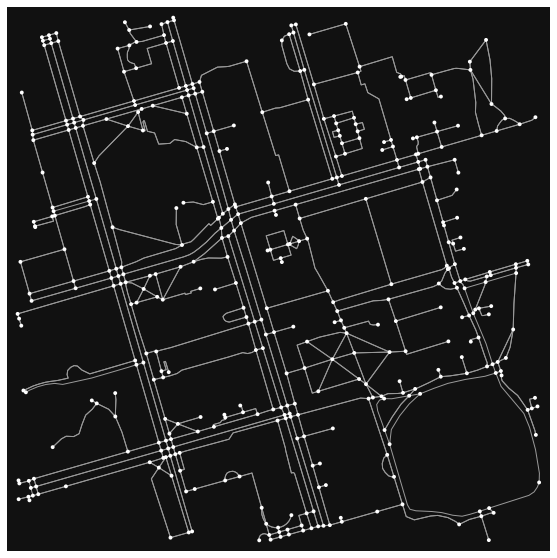

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [14]:
new_graph = osmnx.graph_from_gdfs(nodes,edges)
osmnx.plot_graph(new_graph,figsize=(10,10))

### Calculating Network Statistics

We can see some basic statistics of our graph using `osmnx.basic_stats`.

In [12]:
osmnx.basic_stats(graph)

{'n': 1090,
 'm': 3104,
 'k_avg': 5.695412844036698,
 'edge_length_total': 92073.89100000016,
 'edge_length_avg': 29.6629803479382,
 'streets_per_node_avg': 3.053211009174312,
 'streets_per_node_counts': {0: 0, 1: 154, 2: 0, 3: 579, 4: 349, 5: 7, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.14128440366972478,
  2: 0.0,
  3: 0.5311926605504587,
  4: 0.3201834862385321,
  5: 0.006422018348623854,
  6: 0.0009174311926605505},
 'intersection_count': 936,
 'street_length_total': 48561.08599999995,
 'street_segment_count': 1613,
 'street_length_avg': 30.106066955982612,
 'circuity_avg': 1.0297899024310946,
 'self_loop_proportion': 0.0012399256044637321}

<br><br>
We can also see the circuity average. Circuity average is the sum of edge lengths divided by the sum of straight line distances. It produces a metric > 1 that indicates how "direct" the network is (i.e. how much more distance is required when travelling via the graph as opposed to walking in a straight line).
<br><br>

In [13]:
# osmnx expects an undirected graph
undir = graph.to_undirected()
osmnx.stats.circuity_avg(undir)

1.0328466941401129

### Extended and Density Stats

Density-based statistics requires knowing the area of the graph. To do this, the convex hull of the graph is required.
<br><br>

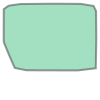

In [14]:
convex_hull = edges.unary_union.convex_hull
convex_hull

In [15]:
import pandas
area = convex_hull.area
stats = osmnx.basic_stats(graph, area=area)
extended_stats = osmnx.extended_stats(graph,ecc=True,cc=True)
stats.update(extended_stats)

# Show the data in a pandas Series for better formatting
pandas.Series(stats)

/home/yinan/book-env/lib/python3.8/site-packages/osmnx/stats.py:405: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


n                                                                                   1090
m                                                                                   3104
k_avg                                                                           5.695413
edge_length_total                                                              92073.891
edge_length_avg                                                                 29.66298
streets_per_node_avg                                                            3.053211
streets_per_node_counts                 {0: 0, 1: 154, 2: 0, 3: 579, 4: 349, 5: 7, 6: 1}
streets_per_node_proportions           {0: 0.0, 1: 0.14128440366972478, 2: 0.0, 3: 0....
intersection_count                                                                   936
street_length_total                                                            48561.086
street_segment_count                                                                1613
street_length_avg    

:::{warning}
`extended_stats` has already been deprecated from `osmnx`. In the absence of an alternative, you can access these metrics directly through `networkx`.
:::

### CRS Projection

You can also look at the projection of the graph. To find out more about projections, check out this [section](IntroductionToGeospatialScience.html#projection). Additionally, you can also reproject the graph to a different CRS.

In [16]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
merc_edges = edges.to_crs(epsg=3857)
merc_edges.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Shortest Path Analysis

Let's revisit our trip across campus from the statue in Queen's Park to our lecture hall at the Bahen centre.

To calculate the shortest path, we first need to find the closest nodes on the network to our starting and ending locations.

In [15]:
import geopandas

X = [source_point[1], destination_point[1]]
Y = [source_point[0], destination_point[0]]
closest_nodes = osmnx.distance.nearest_nodes(graph,X,Y)

# Get the rows from the Node GeoDataFrame
closest_rows = nodes.loc[closest_nodes]

# Put the two nodes into a GeoDataFrame
od_nodes = geopandas.GeoDataFrame(closest_rows, geometry='geometry', crs=nodes.crs)
od_nodes

,y,x,highway,street_count,geometry
osmid,,,,,
390545921,43.665132,-79.394109,NaN,3,POINT (-79.39411 43.66513)
239055725,43.660783,-79.397878,NaN,3,POINT (-79.39788 43.66078)


<br><br>
Let's find and plot the shortest route now!
<br><br>

In [16]:
import networkx

shortest_route = networkx.shortest_path(G=graph,source=closest_nodes[0],target=closest_nodes[1], weight='length')
print(shortest_route)

[390545921, 60654129, 60654119, 389678001, 389678002, 2143434369, 390550470, 127289393, 8277128565, 8277128566, 4920594801, 3996671922, 80927418, 7967019552, 127275360, 80927426, 2143468197, 2143468182, 55808564, 55808527, 130170945, 389677905, 389678182, 389677906, 50885141, 389678180, 1258706668, 2143436407, 1258706673, 2143402269, 2143402268, 1258706670, 239055725]


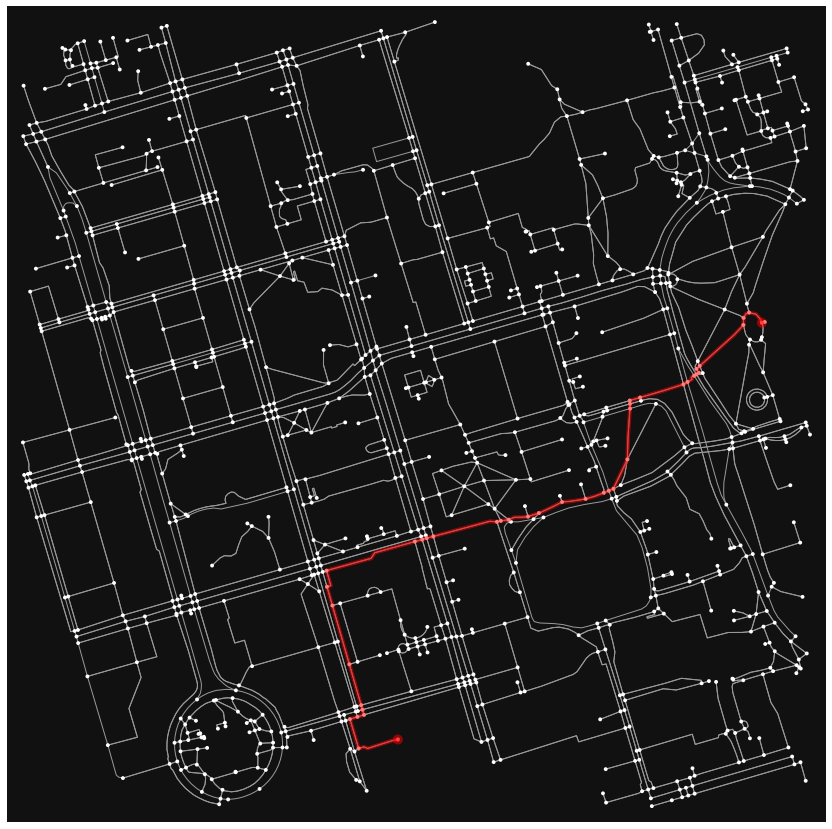

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [20]:
osmnx.plot_graph_route(graph,shortest_route,figsize=(15,15))

Now let's try visualizing this on a `leaflet` map. We'll use the `ipyleaflet` library for this. Graphs rendered in `ipyleaflet` tend to be very slow when there are many nodes. For this reason, the code will fall back to `folium` if there are more than 1,500 nodes in the graph (this particular graph should have ~1,090 nodes).

Let's make a map that shows the above route, with both starting and ending nodes shows as markers.
<br>
<br>

In [17]:
import ipyleaflet
import networkx

def draw_route(G, route, zoom=15):
    if len(G)>=1500:
        # Too many nodes to use ipyleaflet
        return osmnx.plot_route_folium(G=G,route=route)
    
    # Calculate the center node of the graph
    # This used to be accessible from extended_stats, but now we have to do it manually with a undirected graph in networkx
    undir = G.to_undirected()
    length_func = networkx.single_source_dijkstra_path_length
    sp = {source: dict(length_func(undir, source, weight="length")) for source in G.nodes}
    eccentricity = networkx.eccentricity(undir,sp=sp)
    center = networkx.center(undir,e=eccentricity)[0]

    # Create the leaflet map and center it around the center of our graph
    G_gdfs = osmnx.graph_to_gdfs(G)
    nodes_frame = G_gdfs[0]
    ways_frame = G_gdfs[1]
    center_node = nodes_frame.loc[center]
    location = [center_node.y,center_node.x]
    m = ipyleaflet.Map(center=location, zoom=zoom)

    # Get our starting and ending nodes
    start_node = nodes_frame.loc[route[0]]
    end_node = nodes_frame.loc[route[-1]]
    start_xy = [start_node.y, start_node.x]
    end_xy = [end_node.y,end_node.x]

    # Add both nodes as markers
    m.add_layer(ipyleaflet.Marker(location=start_xy, draggable=False))
    m.add_layer(ipyleaflet.Marker(location=end_xy, draggable=False))

    # Add edges of route
    for u,v in zip(route[0:],route[1:]):
        try:
            x,y = (ways_frame.query(f'u == {u} and v == {v}').to_dict('list')['geometry'])[0].coords.xy
        except:
            x,y = (ways_frame.query(f'u == {v} and v == {u}').to_dict('list')['geometry'])[0].coords.xy

        points = map(list, [*zip([*y],[*x])])
        ant_path = ipyleaflet.AntPath(
            locations = [*points], 
            dash_array=[1, 10],
            delay=1000,
            color='#7590ba',
            pulse_color='#3f6fba'
        )
        m.add_layer(ant_path)

    return m
draw_route(graph, shortest_route)


Map(center=[43.6634257, -79.3983718], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

## Retrieve buildings from named place

Just like our graph above, we can also retrieve all the building footprints of a named place.
<br><br>


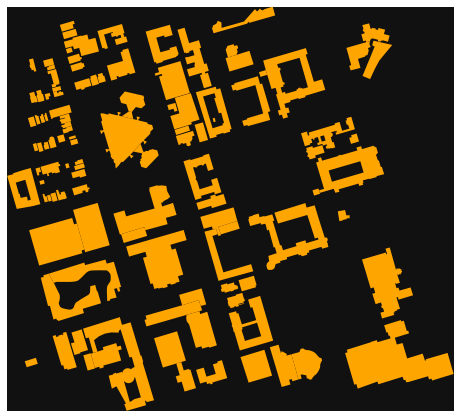

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [23]:
# Retrieve the building footprint, project it to match our previous graph, and plot it.
buildings = osmnx.geometries.geometries_from_address(place_name, tags={'building':True}, dist=300)
buildings = buildings.to_crs(edges.crs)
osmnx.plot_footprints(buildings)


Now that we have the building footprints for the campus, let's plot that shortest route again.

First, get the nodes from the shortest route, create a geometry from it, and then visualize building footprints, street network, and shortest route all on one plot.
<br><br>

In [24]:
from shapely.geometry import LineString

# Nodes of our shortest path
route_nodes = nodes.loc[shortest_route]

# Convert the nodes into a line geometry
route_line = LineString(list(route_nodes.geometry.values))

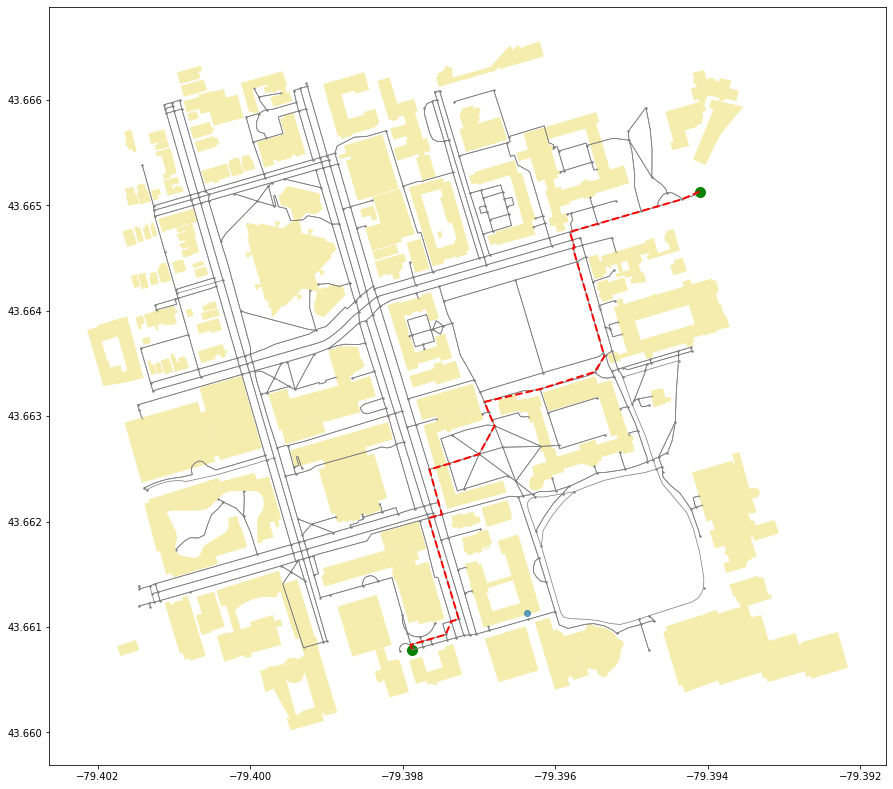

In [25]:
# Create a GeoDataFrame from the line
route_geom = geopandas.GeoDataFrame([[route_line]], geometry='geometry', crs=edges.crs, columns=['geometry'])

# Plot edges and nodes
ax = edges.plot(linewidth=0.75, color='gray', figsize=(15,15))
ax = nodes.plot(ax=ax, markersize=2, color='gray')

# Add building footprints
ax = buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Add the shortest route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Highlight the starting and ending nodes
ax = od_nodes.plot(ax=ax, markersize=100, color='green')